## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
print("We have " + str(df.shape[0]) + " rows in the ab_data.csv file")

We have 294478 rows in the ab_data.csv file


c. The number of unique users in the dataset.

In [4]:
print(str(df.nunique()[0]) + " are unique users")

290584 are unique users


d. The proportion of users converted.

In [5]:
proportion_users_conv = df[df["converted"] == 1].shape[0] / df.shape[0]
print("Users converted represent the " + str(np.round(proportion_users_conv,4)*100) + "% of the total")

Users converted represent the 11.97% of the total


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
print("There are " + str(df.query ('group == "treatment" and landing_page != "new_page"').count()[0]) + " times when treament are not new_page")

There are 1965 times when treament are not new_page


In [8]:
print("There are " + str(df.query ('group == "control" and landing_page != "old_page"').count()[0]) + " times when control are not in old_page")

There are 1928 times when control are not in old_page


In [9]:
print("So we have " + str(1928 + 1965) + " times when new_page and treatment don´t match") 

So we have 3893 times when new_page and treatment don´t match


f. Do any of the rows have missing values?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Seems we haven't got null values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

#### We should only use the rows that we can feel confident in the accuracy of the data. Having that purpose in mind we will remove the rows where treatment is not aligned with new_page or control is not aligned with old page

In [20]:
# I will extract all treatment and new_page, then control and old page and merge them
df_t = df[(df["group"] == "treatment") & (df["landing_page"] == "new_page")]

In [21]:
df_c = df[(df["group"] == "control") & (df["landing_page"] == "old_page")]

In [22]:
# Merge df_c and df_t
df2 = df_t.merge(df_c, how='outer')

In [23]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [24]:
df2.nunique()


user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

There are 290584 unique user_id, so we have one repeated

b. There is one **user_id** repeated in **df2**.  What is it?

In [27]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


It's the user_id 773192

c. What is the row information for the repeat **user_id**? 

In [28]:
df[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [29]:
#Drop duplicates pandas function
df2.drop_duplicates(subset ="user_id", 
                     keep ='first',
                    inplace = True) 

#Source https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/

In [30]:
#Print for checking I did it right
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [61]:
print("The probability of an individual converting regardless of the page they recieve is " +
      str(round(sum(df2['converted'] == 1) / df2.shape[0], 3)))

The probability of an individual converting regardless of the page they recieve is 0.12


b. Given that an individual was in the `control` group, what is the probability they converted?

In [60]:
print("Given that an individual was in the control group, the probability they converted is " +
      str(round(df2[(df2["group"] == "control") & (df2["converted"] == 1)].shape[0] / df2[df2["group"] == "control"].shape[0], 3)))

Given that an individual was in the control group, the probability they converted is 0.12


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [59]:

print("Given that an individual was in the control group, the probability they converted is " +
       str(round(df2[(df2["group"] == "treatment") & (df2["converted"] == 1)].shape[0] / df2[df2["group"] == "treatment"].shape[0], 3)))

Given that an individual was in the control group, the probability they converted is 0.119


d. What is the probability that an individual received the new page?

In [57]:
print("The probability that an individual recieved the new page is " +
      str(round(df2[(df2["group"] == "treatment")].shape[0] / df2.shape[0],3)))

The probability that an individual recieved the new page is 0.5


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer**

It appears that individuals in the treatment group had a conversion rate of 11.88% and individuals in the control grounp had a conversion rate of 12.04%. This difference seems not big enought, but we have to check if it is statistically significant.
Also, we should test if the treatment group does not lead to more conversions than the conversion group. At a first look seems no

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

Null H: **$p_{new}$** - **$p_{old}$**  <= 0 

H1: **$p_{new}$** - **$p_{old}$**  > 0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [63]:
p_new = df2[df2["converted"] == 1].shape[0] / df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [64]:
p_old = df2[df2["converted"] == 1].shape[0] / df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [75]:
n_new = df2[df2["group"] == "treatment"].shape[0]
n_new

145310

d. What is $n_{old}$?

In [76]:
n_old = df2[df2["group"] == "control"].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [78]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-(p_new))])

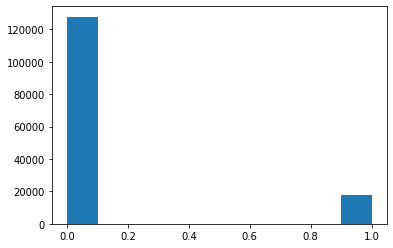

In [80]:
plt.hist(new_page_converted)
plt.show()

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [81]:
# simulate under null for n_new
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-(p_old))])

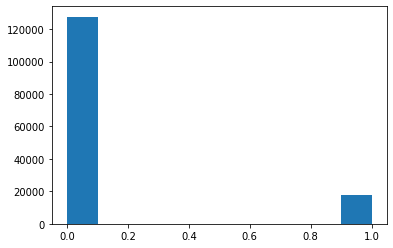

In [82]:
plt.hist(old_page_converted)
plt.show()

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [84]:
difference = new_page_converted.mean() - old_page_converted.mean()
difference

-0.000814573163124957

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [96]:
p_diffs = []
size = df.shape[0] 
for _ in range(10000):
    samp = df2.sample(size, replace = True)

    new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))

    old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))

    difference = new_page_converted.mean() - old_page_converted.mean()

    p_diffs.append(difference)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

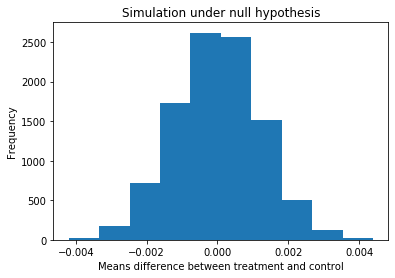

In [100]:
plt.hist(p_diffs)
plt.title("Simulation under null hypothesis")
plt.ylabel("Frequency")
plt.xlabel("Means difference between treatment and control")
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [102]:
# Create number of users with all new_page users and all old_page users with a converted status
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

In [103]:
print(convert_new)
print(convert_old)

17264
17489


In [104]:
# Compute actual converted rate
actual_cvt_new = float(convert_new)/ float(n_new) 
actual_cvt_old = float(convert_old)/ float(n_old)

In [105]:
# Compute observed difference in converted rate 
obs_diff = actual_cvt_new - actual_cvt_old
obs_diff

-0.0015782389853555567

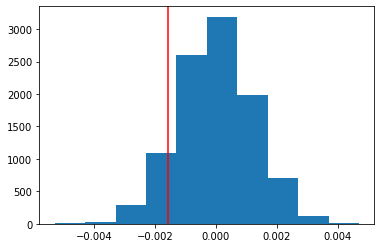

In [106]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(p_diffs), np.array(p_diffs).size)
#Plot Null distribution
plt.hist(null_vals)
#Plot vertical line for observed statistic
plt.axvline(x=obs_diff,color ='red')
plt.show()

In [109]:
print("The proportion is " + str((null_vals > obs_diff).mean()))

The proportion is 0.9017


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**

In part **j** we calclulated the p-value. The p value is the probability of observing your statistic if the null hypothesis is true.

First we assumed that the null hypothesis is true. With that, we assume that, we assume that p_old = p_new, so both pages have the same converting rates over the whole sample. 

Then we assume that the individual converting probability of each page is equal to the one of the whole sample. Based on that, we bootstrapped a sampling distribution for both pages and calculated the differences in the converting probability per page with n equal to the original number of people who received each page and a converting probability of 0.119597. 

With the resulting standard deviation of the differences (which is coming from the simulated population), we then calcualted values coming from a normal distribution around 0. 

As last step we calculated the proportion of values which are bigger than the actually observed difference. The calculated p-value now tells us the probability of receiving this observed statistic if the null hypothesis is true. With a Type-I-Error-Rate of 0.05, we can say that 0.9095 > 0.05, therefore we don't have enough evidence to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [111]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'").converted.sum()
convert_new = df2.query("group == 'treatment'").converted.sum()
n_old = df2.query("landing_page == 'old_page'").count()[0]
n_new = df2.query("landing_page == 'new_page'").count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [112]:
#https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/
from scipy.stats import norm

#calculate z-test
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative="smaller")

#calculate the critical z_term
z_critical=norm.ppf(1-(0.05))

print("Z-Score: ",z_score, "\nCritical Z-Score: ", z_critical, "\nP-Value: ", p_value)


Z-Score:  1.3109241984234394 
Critical Z-Score:  1.6448536269514722 
P-Value:  0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer here.**

The Z-Score is smaller than critical z-score.

We can't false our null hypothesis. In other words, we don't have support for our hypothesis.

Therefore, the converted rate difference between new page and old page it is not statistically significant.

This result here agree with the findings in parts j. and k.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

If our dependent variable is a dummy (only takes two values), we have to apply a logistic regression (LR). A LR has been specifically designed for this kind of varibles.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [113]:
df_lr = df2.copy()
df_lr.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [114]:
#add intercept
df_lr["intercept"] = 1

#get dummies
df_lr = df_lr.join(pd.get_dummies(df_lr['group']))

#rename and call 'ab_page'
df_lr.rename(columns = {"treatment": "ab_page"}, inplace=True)

In [116]:
#print results
df_lr.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [117]:
#Dependent variable
Y = df_lr["converted"]
#Independent variables
X = df_lr[["intercept", "ab_page"]]

#load model
log_mod = sm.Logit(Y,X)

#fit model
result = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [118]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        13:37:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer** The p-value associated with ab_page is 0.19. 

It differs because this one is calculated under a null hypothesis that was the difference between the pages is >= than 0, and the one found in Part II with the null hypotesis that the new page would convert more than the old page, and the alternative was the old page converted more than or equal to the new page.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**

Adding factor would improve the predictive power of our model and "explain more". As we see our pseudo R2 is very low, so we can't predict too much with our regression. We could add the timestamp as a factor.

It is relevant to say there is a trade off in adding variables: we are improving our predictive power but also upgrading the complexity of our model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [121]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [127]:
#Get dummies
countries_dummies = pd.get_dummies(countries_df["country"])
countries_df = countries_df.join(countries_dummies)
countries_df.head()

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [132]:
# Merge countries and df_lr
df_lr_countries = df_lr.merge(countries_df, on="user_id", how="left")

In [133]:
df_lr_countries.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,country,CA,UK,US
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1,CA,1,0,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1,UK,0,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1,CA,1,0,0


In [137]:
# Modeling

Y_2 = df_lr_countries["converted"]
X_2 = df_lr_countries[["intercept", "ab_page", "CA", "UK"]]

lr_mod_2 = sm.Logit(Y_2,X_2)
results = lr_mod_2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 May 2020   Pseudo R-squ.:               2.323e-05
Time:                        14:06:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

**Answer** Countries do not have a statistical impact on results. As you can see in table above there are not statistically significant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [138]:
#create the interaction variables
df_lr_countries["CA_page"], df_lr_countries["UK_page"] = df_lr_countries["CA"] * df_lr_countries["ab_page"], df_lr_countries["UK"] * df_lr_countries["ab_page"]

In [140]:
df_lr_countries.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,country,CA,UK,US,CA_page,UK_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1,0,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1,0,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1,CA,1,0,0,1,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1,UK,0,1,0,0,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1,CA,1,0,0,1,0


In [141]:
### Fit Your Linear Model And Obtain the Results

Y_3 = df_lr_countries["converted"]
X_3 = df_lr_countries[["intercept", "ab_page", "CA", "UK", "CA_page", "UK_page"]]

lr_mod_3 = sm.Logit(Y_3,X_3)
results = lr_mod_3.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 04 May 2020   Pseudo R-squ.:               3.482e-05
Time:                        14:13:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

Our third model shows we found no significance in our new variables. Having that in mind we sholud include other factors and forget these last ones inclusions.